The purpose of this code, is to demonstrate , the power of Feature Engineering on traditional dataset 
The weights trained in this code , can be used to predict the Titanic Data set tutorial competition available on   Kaggle.Even with Logistic model being a linear classifier , has some limitations , with feature engineering, the resulting trained weights produce an astonishing, 0.79 classification rate on the actual competition.
Thus proving , that the cleaned dataset, works well on the competition and also on the given test data set.

In [191]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas
import os 

In [192]:
os.listdir()
df = pandas.read_csv("train_data.csv")
df.head()# Analysing the data set and its columns 

,Unnamed: 0,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,0,1,0,1,0.2750,0.014151,0,0,1,0.1,1,0,0,0,0,0,1
1,1,2,1,0,0.4750,0.139136,1,0,0,0.1,1,0,0,0,1,0,0
2,2,3,1,0,0.3250,0.015469,0,0,1,0.0,0,0,0,1,0,0,1
3,3,4,1,0,0.4375,0.103644,1,0,0,0.1,1,0,0,0,0,0,1
4,4,5,0,1,0.4375,0.015713,0,0,1,0.0,1,0,0,0,0,0,1


In [193]:
def get_data(string):
    if string=="train":
        df = pandas.read_csv("train_data.csv")
       
    else:
        df=pandas.read_csv("test_data.csv")
        
        
    T = np.asarray(df.ix[:,"Survived"]).reshape(df["Survived"].shape[0],1)
    X=np.asarray(df.ix[:,"Sex":])# splitting our input & target variables 
    #adding bias
    bias = np.ones((df["Survived"].shape[0],1))
    X = np .hstack([bias,X])
    return X,T
def sigmoid(Z):
    Z =np.exp(-Z)
    return 1/(1+Z)
def forward(X,W):
    out = sigmoid(X.dot(W))
    return out
def cross_entropy(T,Y):
    return -(T*np.log(Y)+(1-T)*np.log(1-Y)).sum()
def classification_rate(T,Y):
    return np.mean(T==Y)

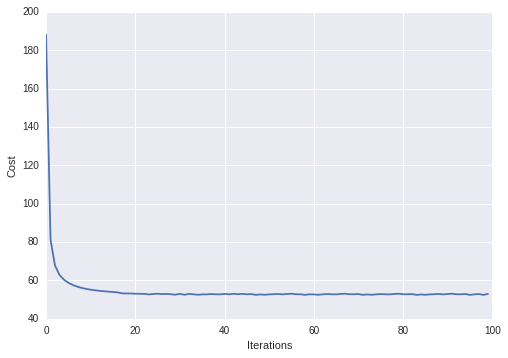

Classification rate on training set 0.751262626263
Classification rate on test set  0.86


In [194]:
X,T = get_data("train")
X_test , Y_test = get_data("test")
N,D = X.shape
W = np.random.randn(D,1) # setting up the weight matrix 
learning_rate = 10e-3
reg =10e-1
cost=[]
#running gradient descent now 
for i in range(0,2000):
    Y_train=forward(X,W)
    W = W - learning_rate*(X.T.dot(Y_train-T)+reg*np.sign(W))#We used l1 regularization here 
    if i%20 ==0:
        Y_pred = forward(X_test,W)
        c = cross_entropy(Y_test,Y_pred)
        cost.append(c)
        r=classification_rate(Y_test,np.round(Y_pred))
        R =classification_rate(T,np.round(Y_train))

plt.plot(cost)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()
print("Classification rate on training set",R)
print("Classification rate on test set ",r)